# The Sparks Foundation || GRIP MAY-21

### Data Science and Business Analytics

### TASK 3 - Exploratory Data Analysis - Retail

### Author : Ajay Akash A

● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can work to make more profit.

● What all business problems you can derive by exploring the data?.

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset

In [5]:
dataset = pd.read_csv('C:/Users/WINDOWS/Downloads/SampleSuperstore.csv')

In [6]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
dataset.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Handling missing data

In [8]:
dataset.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Handling duplicate records

In [9]:
duplicate=dataset.duplicated()
print(duplicate.sum())
dataset[duplicate]

17


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
950,Standard Class,Home Office,United States,Philadelphia,Pennsylvania,19120,East,Office Supplies,Paper,15.552,3,0.2,5.4432
3406,Standard Class,Home Office,United States,Columbus,Ohio,43229,East,Furniture,Chairs,281.372,2,0.3,-12.0588
3670,Standard Class,Consumer,United States,Salem,Oregon,97301,West,Office Supplies,Paper,10.368,2,0.2,3.6288
4117,Standard Class,Consumer,United States,Los Angeles,California,90036,West,Office Supplies,Paper,19.440,3,0.0,9.3312
4553,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,12.840,3,0.0,5.7780
5905,Same Day,Home Office,United States,San Francisco,California,94122,West,Office Supplies,Labels,41.400,4,0.0,19.8720
6146,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Art,11.760,4,0.0,3.1752
6334,Standard Class,Consumer,United States,New York City,New York,10011,East,Office Supplies,Paper,49.120,4,0.0,23.0864
6357,Standard Class,Corporate,United States,Seattle,Washington,98103,West,Office Supplies,Paper,25.920,4,0.0,12.4416
7608,Standard Class,Consumer,United States,San Francisco,California,94122,West,Office Supplies,Paper,25.920,4,0.0,12.4416


In [10]:
dataset.drop_duplicates(inplace=True)

In [11]:
dpl=dataset.duplicated()
dpl.sum()

0

# Handling outliers

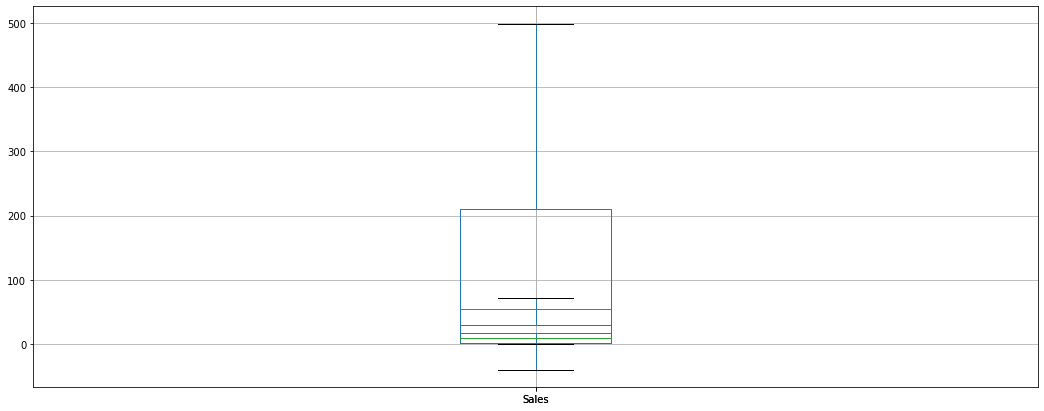

In [34]:
dataset.boxplot(column=["Profit"],figsize = (18,7))
dataset.boxplot(column=["Sales"])
plt.show()

# Removing outliers

In [22]:
def remove_outlier(col):
  sorted(col)
  q1,q3=col.quantile([0.25,0.75])
  IQR=q3-q1
  lower_range=q1-(1.5*IQR)
  upper_range=q3+(1.5*IQR)
  return lower_range, upper_range

In [23]:
lowsales,upsales=remove_outlier(dataset['Sales'])
dataset['Sales']=np.where(dataset['Sales']>upsales,upsales,dataset['Sales'])
dataset['Sales']=np.where(dataset['Sales']<lowsales,lowsales,dataset['Sales'])

<function matplotlib.pyplot.show(close=None, block=None)>

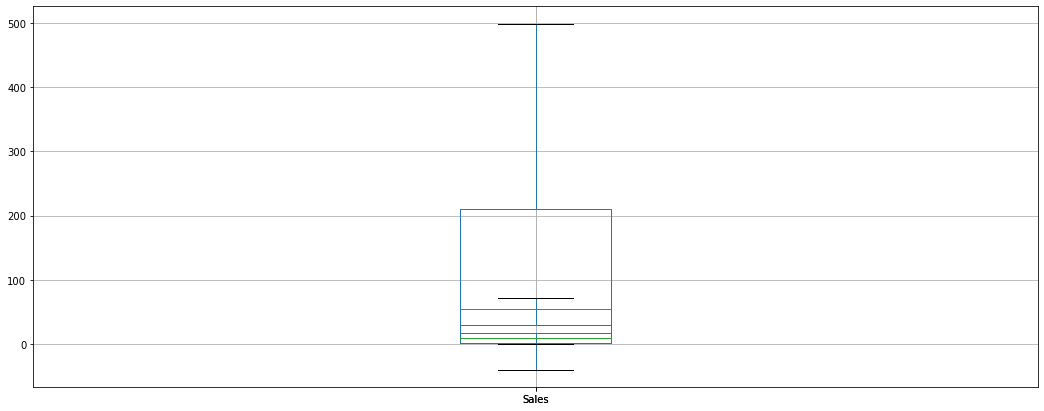

In [33]:
dataset.boxplot(column=["Profit"],figsize = (18,7))
dataset.boxplot(column=["Sales"])
plt.show

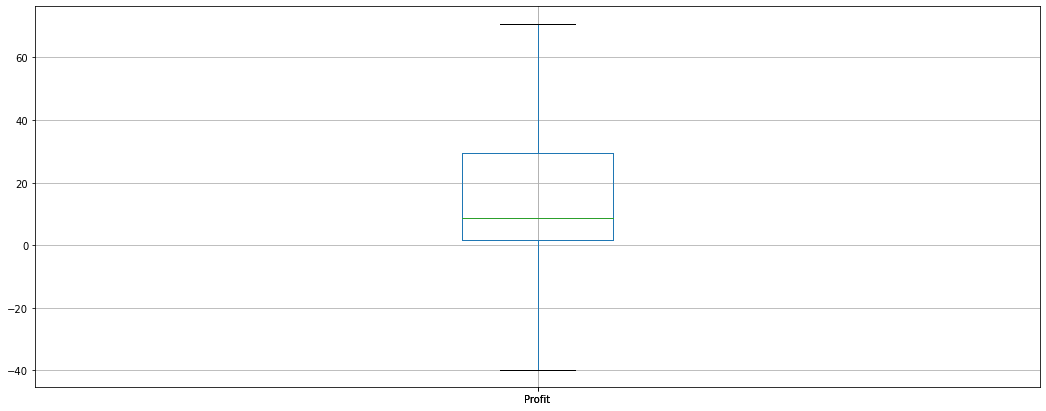

In [32]:
dataset.boxplot(column=["Profit"],figsize = (18,7))
dataset.boxplot(column=["Profit"])
plt.show()

In [26]:
lowprofit,upprofit=remove_outlier(dataset['Profit'])
dataset['Profit']=np.where(dataset['Profit']>upprofit,upprofit,dataset['Profit'])
dataset['Profit']=np.where(dataset['Profit']<lowprofit,lowprofit,dataset['Profit'])

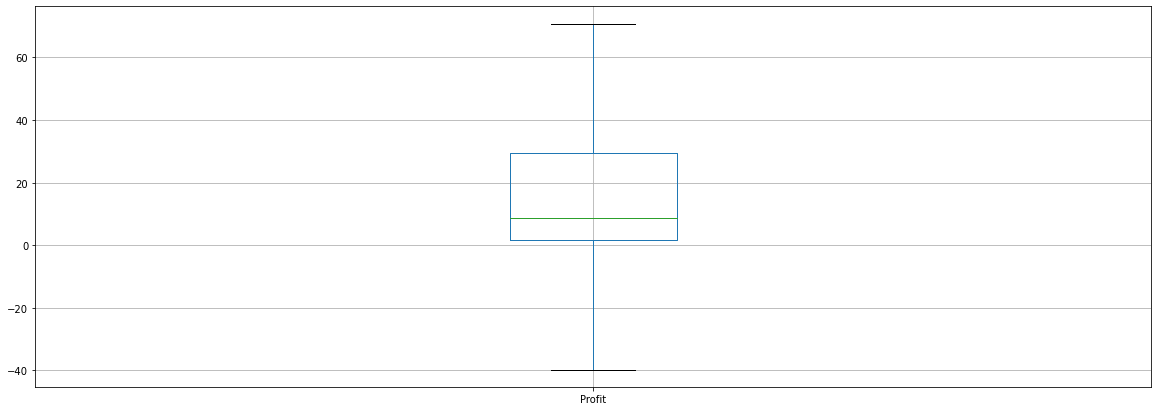

In [31]:
dataset.boxplot(column=["Profit"],figsize = (18,7))
plt.show()

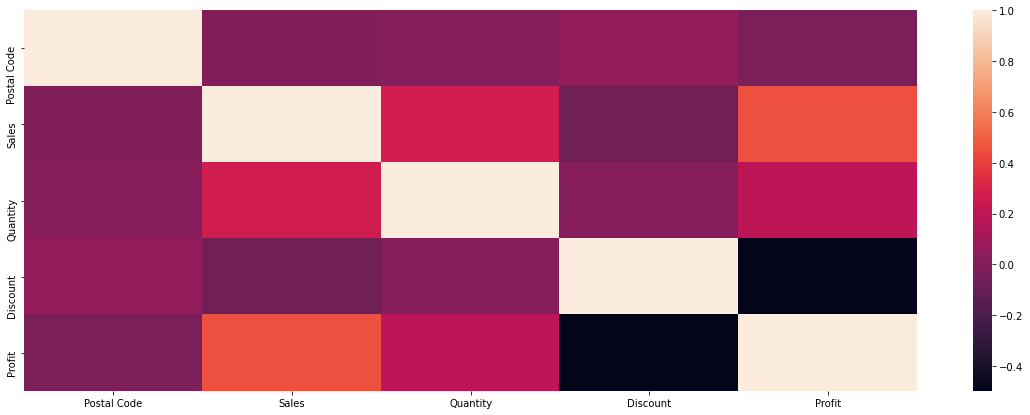

In [30]:
fig, axes = plt.subplots(1,1, figsize = (20,7))
sns.heatmap(dataset.corr())
plt.show()

Here we can see discount and profit are highly negative corelated. Values closer to zero means there is no linear trend between the two variables. The values Closer to 1 the correlation is the more positive. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases

*Here we can see discount and profit are highly negatively corelated

*Sales and Profits are Moderately Correlated

*Quantity and Profit are Moderately Correlated

In [56]:
plt.figure(figsize=(10,10), figsize = (20,7))
dataset.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

SyntaxError: keyword argument repeated (<ipython-input-56-f299be6c4b17>, line 1)

<ipython-input-57-12151d3b77d7>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataset.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()


<Figure size 1152x720 with 0 Axes>

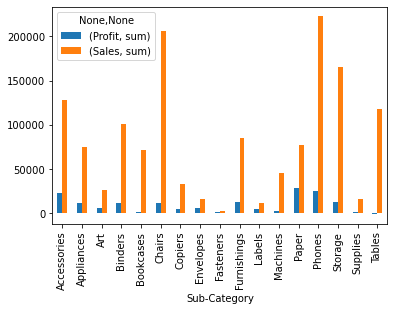

In [57]:
plt.figure(figsize=(16,10))
dataset.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.show()

<Figure size 2448x1440 with 0 Axes>

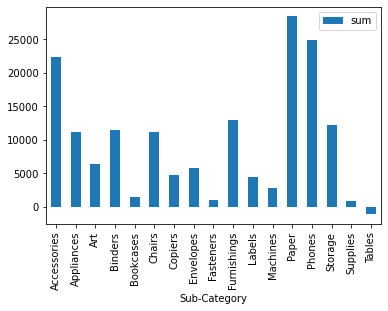

In [58]:
plt.figure(figsize=(34,20))
dataset.groupby('Sub-Category')['Profit'].agg(['sum']).plot.bar()
plt.show()

In the above sub-category section, with respect to profit::

1) Tablets are expereincing loss

2) Supplies produces the least amout of profit

3) PAPER produces maximum profit

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

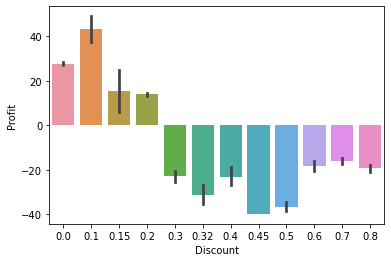

In [45]:
sns.barplot(x=dataset.Discount,y=dataset.Profit)

<AxesSubplot:xlabel='Region', ylabel='Profit'>

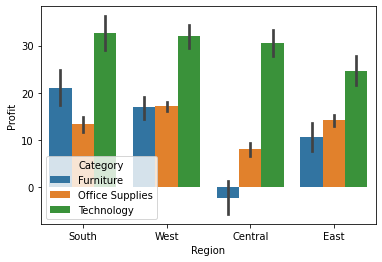

In [46]:
sns.barplot(x=dataset.Region, y=dataset.Profit,hue=dataset.Category)


When we perform a bivariate analsyis of region and category with respect to profit, we can conclude from the above graph that:

* Furniture is facing loss in the Central region

* Technology gets maximum profit in the Southern region.

<ipython-input-47-041cdcf83c00>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dataplot = dataset.groupby(['State'])['Sales', 'Profit'].sum()


<AxesSubplot:xlabel='State'>

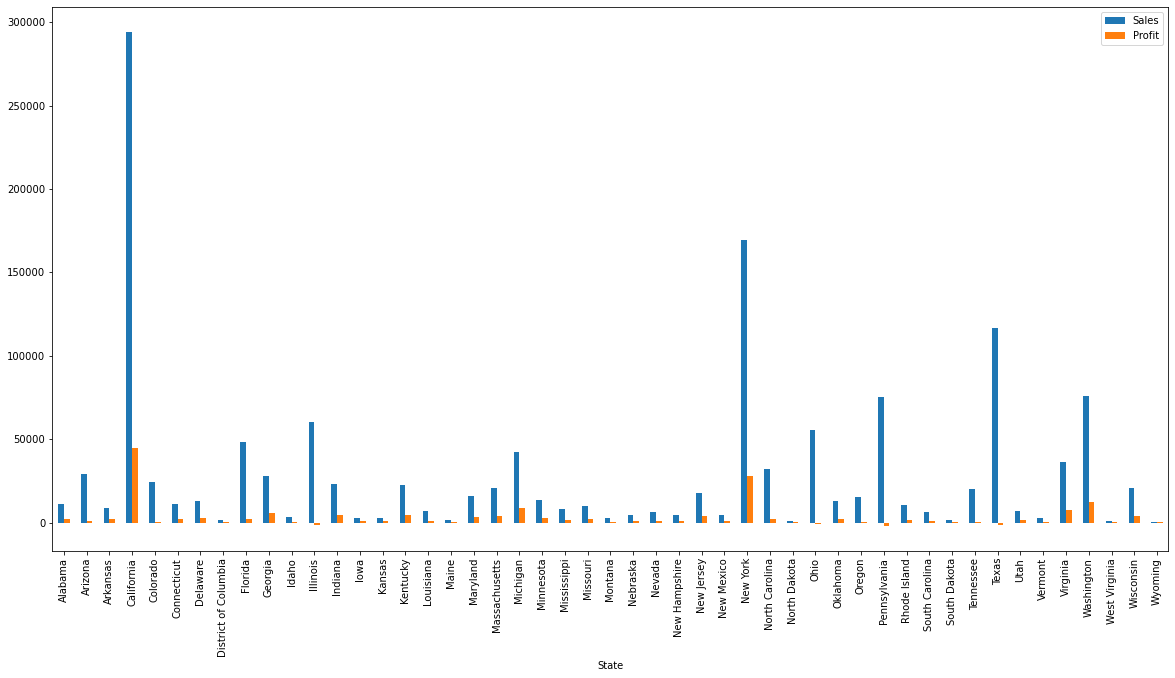

In [47]:
dataplot = dataset.groupby(['State'])['Sales', 'Profit'].sum()
dataplot.plot.bar(figsize = (20,10))

In [48]:
dataset['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

In [54]:
(dataset['Ship Mode'].value_counts()/len(dataset['Ship Mode']))*100

Standard Class    59.687281
Second Class      19.474792
First Class       15.405432
Same Day           5.432495
Name: Ship Mode, dtype: float64

<AxesSubplot:>

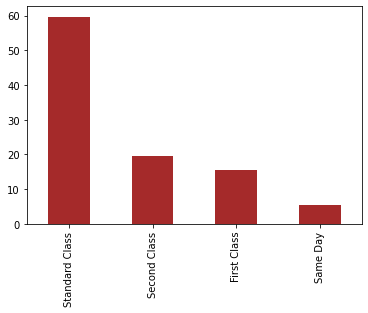

In [50]:
((dataset['Ship Mode'].value_counts()/len(dataset['Ship Mode']))*100).plot(kind="bar", color="brown")


Conclusions when the ship mode data is analysed:

* Maximum number of shipments belong to tha standard class

* whereas, very less number of shipments are done on the same day (10%)

In [51]:
dataset['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

In [53]:
(dataset['Category'].value_counts()/len(dataset['Category']))*100

Office Supplies    60.258595
Furniture          21.228826
Technology         18.512579
Name: Category, dtype: float64

<AxesSubplot:>

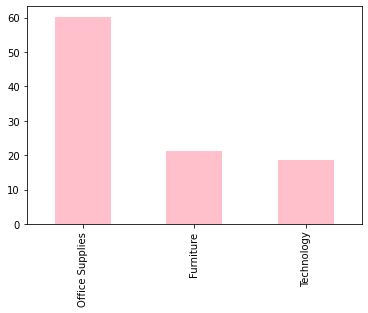

In [55]:
((dataset['Category'].value_counts()/len(dataset['Category']))*100).plot(kind="bar", color="pink")


In the Category Section:

* Almost 60% of products belong to Office supplies

* Almost 18% of product belong to Technology which is the minimum